In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, cohen_kappa_score

In [2]:
xtrain = open('X_train.txt','r')
ytrain = open('y_train.txt','r')
xtest = open('X_test.txt','r')
ytest = open('y_test.txt','r')

In [3]:
def reading(f):
    xtrain = []
    Lines = f.readlines() 
    for line in Lines: 
    #     x_train = line.strip()
        x_train = line.split(' ')
        X_train_line = []
        for v in x_train:
            try:
                n = float(v)
                X_train_line.append(n)
            except:
                continue
        xtrain.append(X_train_line)
    return xtrain

In [4]:
x_train = np.array(reading(xtrain))
x_test = np.array(reading(xtest))
y_train = np.array(reading(ytrain))
y_test = np.array(reading(ytest))

In [5]:
print('X Train Shape: ',x_train.shape,'\n')
# print('Y Train Shape: ',y_train.shape,'\n')
y_train = np.reshape(y_train,-1)
print('Y Train Shape: ',y_train.shape,'\n')
print('X Test Shape: ',x_test.shape,'\n')
y_test = np.reshape(y_test,-1)
print('Y Test Shape: ',y_test.shape,'\n')

X Train Shape:  (7352, 561) 

Y Train Shape:  (7352,) 

X Test Shape:  (2947, 561) 

Y Test Shape:  (2947,) 



In [6]:
from sklearn.linear_model import LogisticRegression 

logreg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
logreg.fit(x_train,y_train)

y_pred=logreg.predict_proba(x_test)

D:\Anaconda3\envs\tf_gpu_2020\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [7]:
y_predicted = []
for l in y_pred:
    idx = np.where(l==np.max(l))[0][0]
    y_predicted.append(float(idx+1))

In [8]:
from sklearn.metrics import accuracy_score,balanced_accuracy_score,f1_score,precision_score,zero_one_loss

bal_acc = balanced_accuracy_score(y_test,y_predicted)
f1_score_lg_w = f1_score(y_test,y_predicted, average ='weighted')
f1_score_lg_ma = f1_score(y_test,y_predicted, average ='macro')
f1_score_lg_mic = f1_score(y_test,y_predicted, average ='micro')
precision_sc = precision_score(y_test,y_predicted, average ='weighted')
zer_one_lg = zero_one_loss(y_test,y_predicted)

print('Balanced Accuracy: ', bal_acc)
print('F1 Score Weighted: ', f1_score_lg_w)
print('F1 Score Macro: ', f1_score_lg_ma)
print('F1 Score Micro: ', f1_score_lg_mic)
print('Precision Score: ', precision_sc)
print('Zero-One Loss: ',zer_one_lg)

Balanced Accuracy:  0.9572435050441088
F1 Score Weighted:  0.9581199772501342
F1 Score Macro:  0.9581435813651663
F1 Score Micro:  0.9582626399728538
Precision Score:  0.9595551909471116
Zero-One Loss:  0.04173736002714623


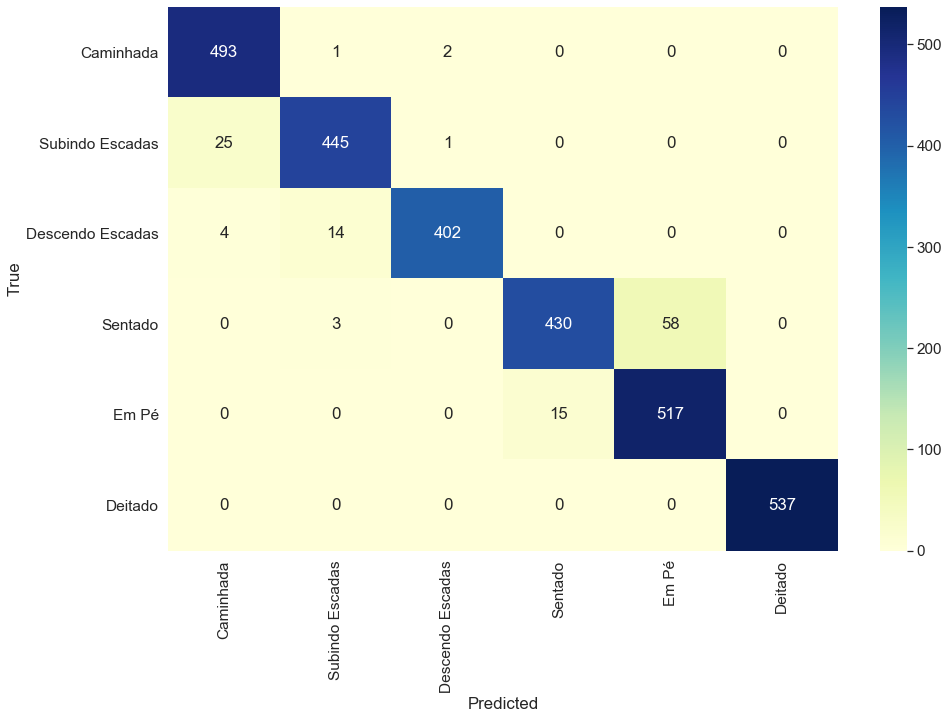

In [9]:
from sklearn.metrics import confusion_matrix 
import seaborn as sn

conf = confusion_matrix(y_test, y_predicted)

# df_cm = pd.DataFrame(conf, index = [i for i in "012345"],
#                   columns = [i for i in "012345"])
df_cm = pd.DataFrame(conf, index = ['Caminhada','Subindo Escadas','Descendo Escadas',
                                   'Sentado','Em Pé','Deitado'],
                  columns = ['Caminhada','Subindo Escadas','Descendo Escadas',
                                   'Sentado','Em Pé','Deitado'])
plt.figure(figsize = (15,10))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, annot=True,fmt='g', cmap="YlGnBu")

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# K-Nearest Neighbors Uniform

In [11]:
zol_k_values = []
for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit (x_train, y_train)
    y_pred_k = knn.predict(x_test)
#     y_pred_k=knn.predict_proba(x_test)
#     y_predicted_k = []
#     for l in y_pred_k:
#         idx = np.where(l==np.max(l))[0][0]
#         y_predicted_k.append(float(idx+1))

    zero_one_k = zero_one_loss(y_test,y_pred_k)
    zol_k_values.append(zero_one_k)

0.09263657957244653
8


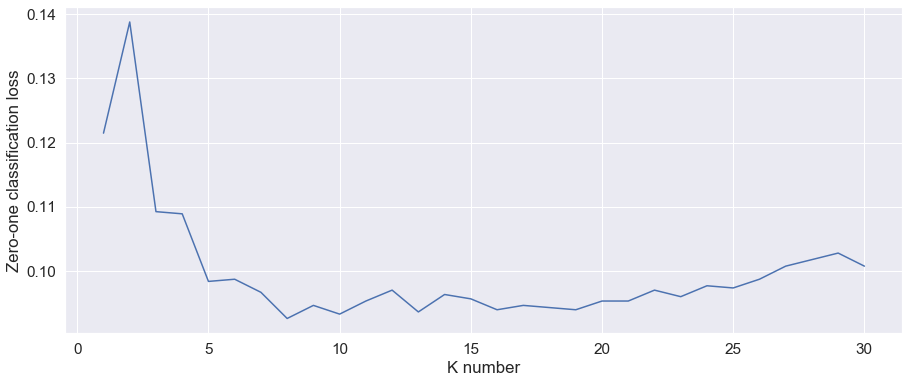

In [12]:

k_values = [x for x in range(1,31)]
plt.figure(figsize = (15,6))
plt.plot(k_values,zol_k_values)
plt.xlabel('K number')
plt.ylabel('Zero-one classification loss')
plt.grid('on')
print(np.min(zol_k_values))
print(k_values[zol_k_values.index(np.min(zol_k_values))])

In [13]:
knn = KNeighborsClassifier(n_neighbors=k_values[zol_k_values.index(np.min(zol_k_values))])

knn.fit (x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [14]:
y_pred_k = knn.predict_proba(x_test)
# print(y_pred_k[:2])
y_predicted_k = []
for l in y_pred_k:
    idx = np.where(l==np.max(l))[0][0]
    y_predicted_k.append(float(idx+1))

In [15]:
y_test_int = [int(x) for x in y_test]
y_predicted_k_int = [int(x) for x in y_predicted_k]

bal_acc_k = balanced_accuracy_score(y_test_int,y_predicted_k_int)

f1_score_k_w = f1_score(y_test_int,y_predicted_k_int, average ='weighted')

f1_score_k_ma = f1_score(y_test_int,y_predicted_k_int, average ='macro')

f1_score_k_mic = f1_score(y_test_int,y_predicted_k_int, average ='micro')

precision_sc_k = precision_score(y_test_int,y_predicted_k_int, average ='weighted')

zer_one_k = zero_one_loss(y_test_int,y_predicted_k_int)

print('Balanced Accuracy: ', bal_acc_k)
print('F1 Score Weighted: ', f1_score_k_w)
print('F1 Score Macro: ', f1_score_k_ma)
print('F1 Score Micro: ', f1_score_k_mic)
print('Precision Score: ', precision_sc_k)
print('Zero-One Loss: ', zer_one_k)

Balanced Accuracy:  0.9028024386363711
F1 Score Weighted:  0.9067678315396412
F1 Score Macro:  0.9044789027262965
F1 Score Micro:  0.9073634204275535
Precision Score:  0.9110118135027157
Zero-One Loss:  0.09263657957244653


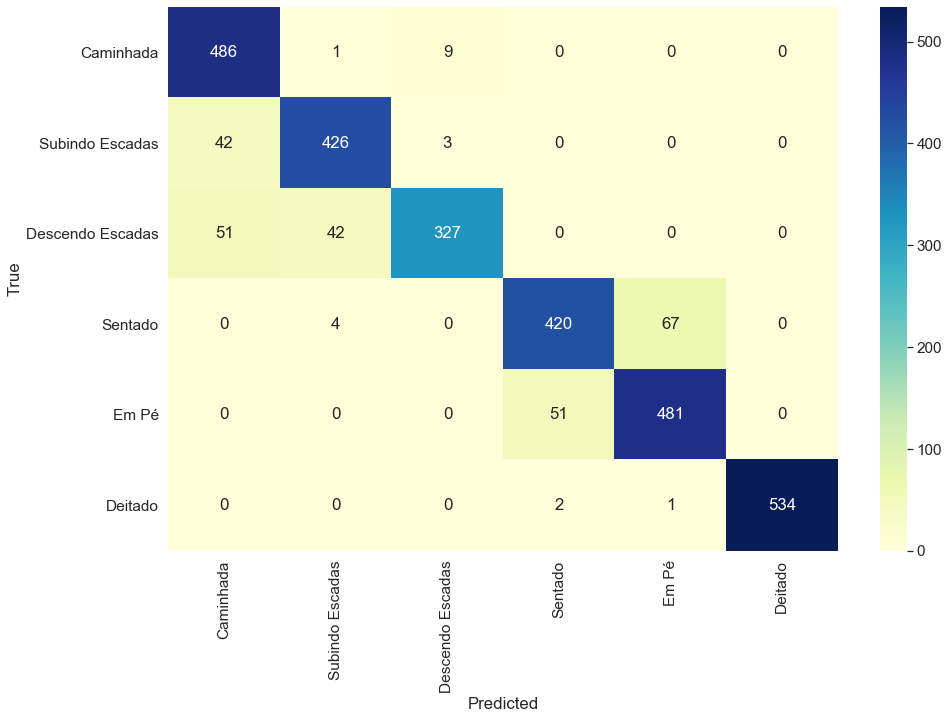

In [16]:
conf_k = confusion_matrix(y_test, y_predicted_k)

# df_cm = pd.DataFrame(conf, index = [i for i in "012345"],
#                   columns = [i for i in "012345"])
df_cm = pd.DataFrame(conf_k, index = ['Caminhada','Subindo Escadas','Descendo Escadas',
                                   'Sentado','Em Pé','Deitado'],
                  columns = ['Caminhada','Subindo Escadas','Descendo Escadas',
                                   'Sentado','Em Pé','Deitado'])
plt.figure(figsize = (15,10))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, annot=True,fmt='g', cmap="YlGnBu")

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Comparison

In [17]:
print('BALANCED ACCURACY')
print('-----------------')
print('Logistic Regression')
print('{:.4f}'.format(bal_acc),'\n')
print('KNN')
print('{:.4f}'.format(bal_acc_k),'\n')

print('_________________')
print('F1 SCORE WEIGHTED')
print('-----------------')
print('Logistic Regression')
print('{:.4f}'.format(f1_score_lg_w),'\n')
print('KNN')
print('{:.4f}'.format(f1_score_k_w),'\n')

print('_________________')
print('F1 SCORE MACRO')
print('-----------------')
print('Logistic Regression')
print('{:.4f}'.format(f1_score_lg_ma),'\n')
print('KNN')
print('{:.4f}'.format(f1_score_k_mic),'\n')

print('_________________')
print('F1 SCORE MICRO')
print('-----------------')
print('Logistic Regression')
print('{:.4f}'.format(f1_score_lg_mic),'\n')
print('KNN')
print('{:.4f}'.format(f1_score_k_mic),'\n')

print('_________________')
print('PRECISION SCORE')
print('-----------------')
print('Logistic Regression')
print('{:.4f}'.format(precision_sc),'\n')
print('KNN')
print('{:.4f}'.format(precision_sc_k),'\n')

print('_________________')
print('ZERO-ONE LOSS')
print('-----------------')
print('Logistic Regression')
print('{:.4f}'.format(zer_one_lg),'\n')
print('KNN')
print('{:.4f}'.format(zer_one_k),'\n')

BALANCED ACCURACY
-----------------
Logistic Regression
0.9572 

KNN
0.9028 

_________________
F1 SCORE WEIGHTED
-----------------
Logistic Regression
0.9581 

KNN
0.9068 

_________________
F1 SCORE MACRO
-----------------
Logistic Regression
0.9581 

KNN
0.9074 

_________________
F1 SCORE MICRO
-----------------
Logistic Regression
0.9583 

KNN
0.9074 

_________________
PRECISION SCORE
-----------------
Logistic Regression
0.9596 

KNN
0.9110 

_________________
ZERO-ONE LOSS
-----------------
Logistic Regression
0.0417 

KNN
0.0926 

